In [11]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , confusion_matrix , precision_score , recall_score , roc_curve

In [ ]:
df = pd.read_csv('./dataset/data_standardized.csv') #ALREADY STANDARDIZED
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [5]:
#Indepenendent Variable and Dependent variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [38]:
#Splitting Train and test data (80:20)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [9]:
#Data Standardized and suitable for modelling

model = LogisticRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[: , 1]


In [10]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9761904761904762
Recall: 0.9534883720930233
ROC-AUC Score: 0.99737962659679


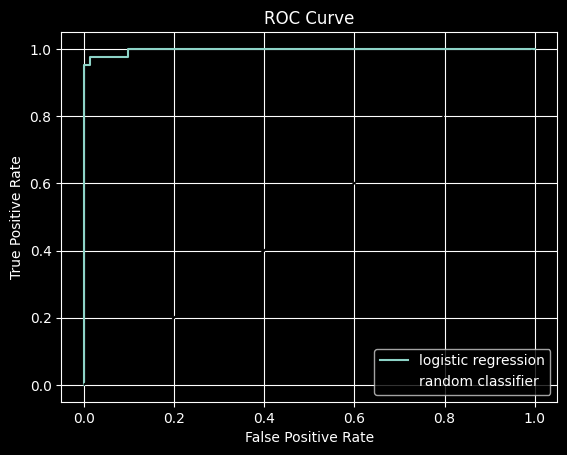

In [35]:
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='logistic regression')
plt.plot([0,1], [0,1], 'k--', label='random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#best value for threshold
threshold = 0.4
y_custom = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test, y_custom))
print("Precision:", precision_score(y_test, y_custom))
print("Recall:", recall_score(y_test, y_custom))

[[70  1]
 [ 1 42]]
Precision: 0.9767441860465116
Recall: 0.9767441860465116
